In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import Aer, IBMQ

# import basic plot tools
from qiskit.tools.visualization import matplotlib_circuit_drawer as circuit_drawer
from qiskit.tools.visualization import plot_histogram, qx_color_scheme
from qiskit.tools import visualization


#IBMQ.load_accounts()

In [13]:
#先实验2比特的Grover算法
n=3
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

#制备初态
qc.h(qr[0])
qc.h(qr[1])
qc.x(qr[2])
qc.h(qr[2])

#Oracle
qc.ccx(qr[0],qr[1],qr[2])

#Hn
qc.h(qr[0])

qc.h(qr[1])

#条件相移
qc.x(qr[0])
qc.cx(qr[0],qr[1])
qc.cz(qr[0],qr[1])
qc.cx(qr[0],qr[1])
qc.x(qr[0])

'''
qc.x(qr[0])
qc.cu3(-pi,0,0,qr[0],qr[1])#cRy(-pi)
qc.crz(-2*pi,qr[0],qr[1])
qc.x(qr[0])

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,2))
'''
#Hn
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

shots=1024
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
visualization.plot_histogram(counts)
circuit_drawer(qc)


[-0.-0.j  0.-0.j  0.-0.j -0.-0.j  0.+0.j -0.-0.j  0.-0.j -1.+0.j]


"\n#测量\nfor i in range(n):\n    qc.measure(qr[i],cr[i])\n\nshots=1024\nbackend = Aer.get_backend('qasm_simulator')\njob = execute(qc, backend, shots=shots)\nresult = job.result()\ncounts = result.get_counts(qc)\nvisualization.plot_histogram(counts)\ncircuit_drawer(qc)\n"

D:\Anaconda3\lib\site-packages\qiskit\tools\visualization\_circuit_visualization.py:544: DeprecationWarning: The matplotlib_circuit_drawer() function is deprecated and will be removed in a future release. Instead use the circuit_drawer() function with the `output` kwarg set to `mpl`.
  '`mpl`.', DeprecationWarning)


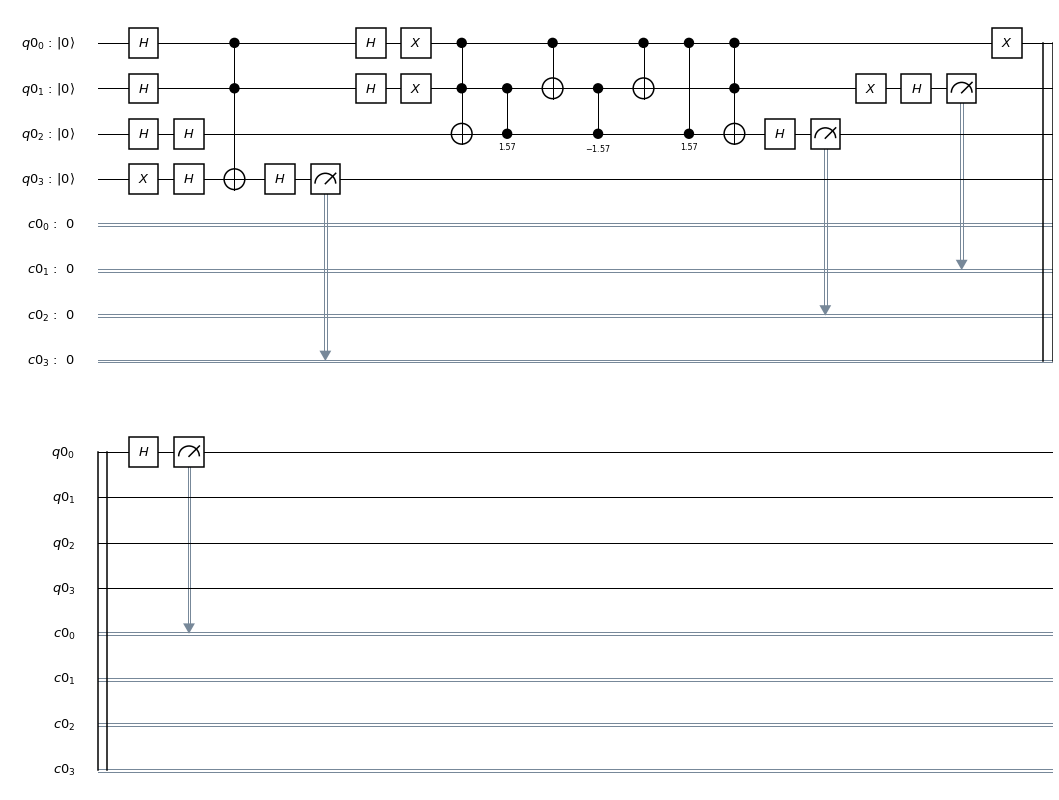

In [3]:
#3比特Grover算法
#标记的解空间为x=3,x=7
n=4
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

#制备初态
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.x(qr[3])
qc.h(qr[3])


#oracle
qc.ccx(qr[0],qr[1],qr[3])

#Hn
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

#条件相移
qc.x(qr[0])
qc.x(qr[1])
qc.ccx(qr[0],qr[1],qr[2])
qc.cu1(pi/2,qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.cu1(-pi/2,qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.cu1(pi/2,qr[0],qr[2])
qc.ccx(qr[0],qr[1],qr[2])
qc.x(qr[0])
qc.x(qr[1])


#Hn
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

qc.h(qr[3])
'''
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,2))
'''

#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

shots=1024
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
visualization.plot_histogram(counts)
circuit_drawer(qc)


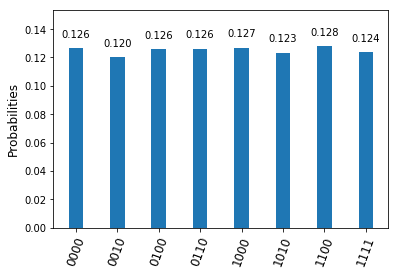

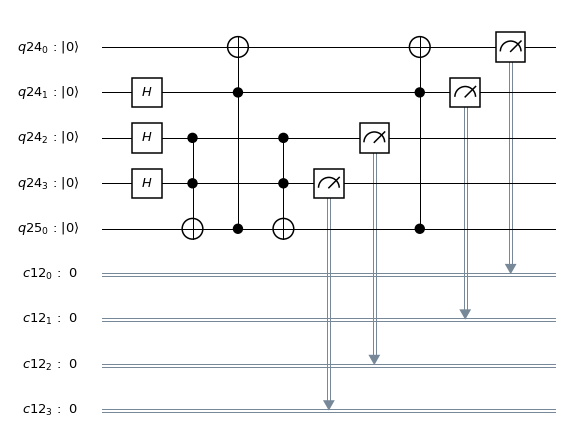

In [15]:
#测试c3x门的分解
n=4
qr = QuantumRegister(n)
qr1 = QuantumRegister(1)#辅助比特
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,qr1,cr)


qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])

qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特
qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特
'''
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,4))

backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
a = np.round(job.result().get_data(qc)['unitary'], 3)
print(a.shape)
'''

#测量

for i in range(n):
    qc.measure(qr[i],cr[i])

shots=1024
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
visualization.plot_histogram(counts)
circuit_drawer(qc)


D:\Anaconda3\lib\site-packages\qiskit\tools\visualization\_circuit_visualization.py:544: DeprecationWarning: The matplotlib_circuit_drawer() function is deprecated and will be removed in a future release. Instead use the circuit_drawer() function with the `output` kwarg set to `mpl`.
  '`mpl`.', DeprecationWarning)


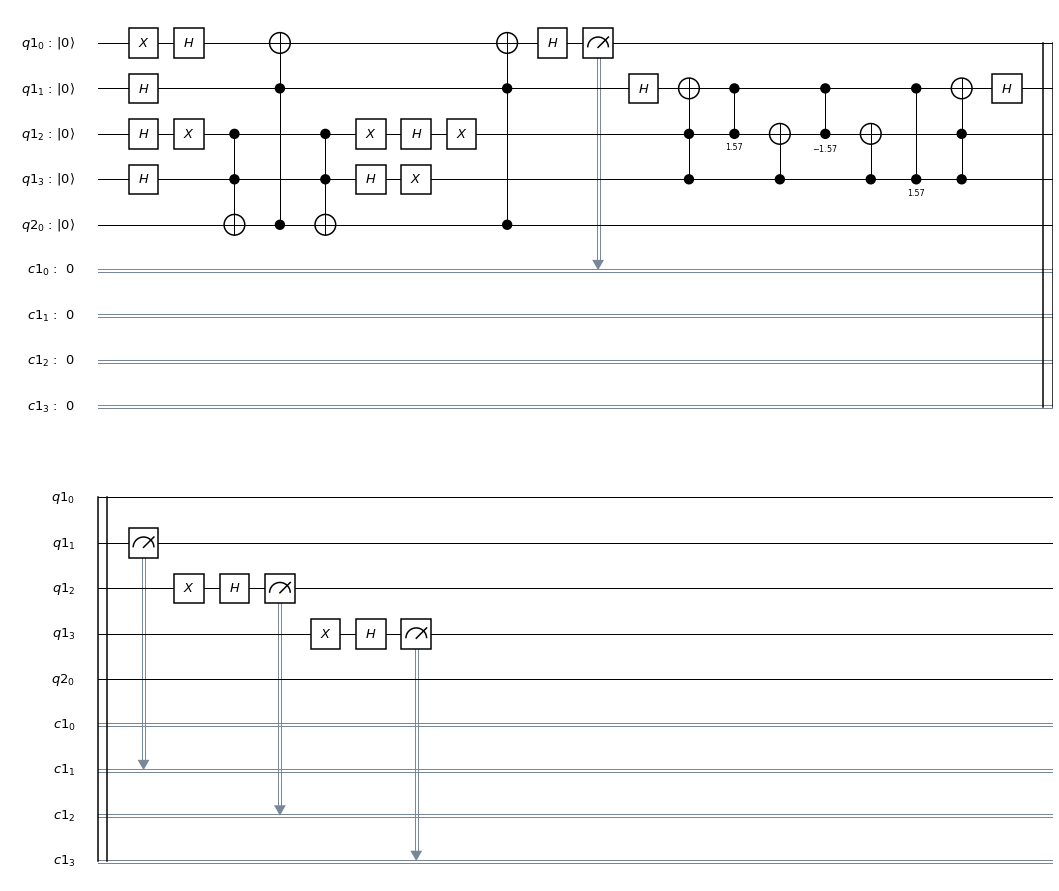

In [4]:
#3比特的Grover搜索算法
#解x=7
n=4#
anc = 1#辅助比特数
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qr1 = QuantumRegister(anc)#辅助比特不需要测量
qc = QuantumCircuit(qr,qr1,cr)

#制备初态
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])
qc.x(qr[0])
qc.h(qr[0])


#oracle
qc.x(qr[2])
qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特
qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特
qc.x(qr[2])

#qc.ccx(qr[3],qr[2],qr[0])#解x=0，x=1
#Hn
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])

#条件相移
qc.x(qr[3])
qc.x(qr[2])
qc.ccx(qr[3],qr[2],qr[1])
qc.cu1(pi/2,qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.cu1(-pi/2,qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.cu1(pi/2,qr[3],qr[1])
qc.ccx(qr[3],qr[2],qr[1])
qc.x(qr[3])
qc.x(qr[2])

#Hn
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])

qc.h(qr[0])

'''
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,4))
'''
#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

shots=10240
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
visualization.plot_histogram(counts)
circuit_drawer(qc)


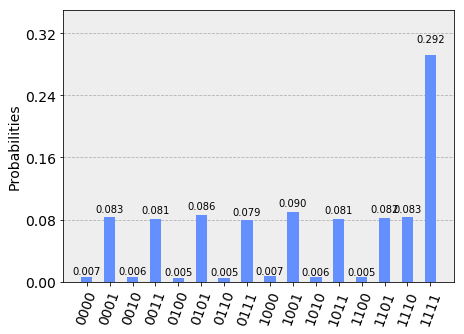

In [7]:
#接着验证龙老师的相位匹配的改进算法
#phi = 2.1269
#解x=7
n=4#
anc = 1#辅助比特数
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qr1 = QuantumRegister(anc)#辅助比特不需要测量
qc = QuantumCircuit(qr,qr1,cr)

#制备初态
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])
qc.x(qr[0])
qc.u1(2.1269,qr[0])

#oracle
qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特
qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特


#qc.ccx(qr[3],qr[2],qr[0])#解x=0，x=1
#Hn
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])

#条件相移
qc.x(qr[3])
qc.x(qr[2])
qc.ccx(qr[3],qr[2],qr[1])
qc.cu1(-2.1269/2,qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.cu1(2.1269/2,qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.cu1(-2.1269/2,qr[3],qr[1])
qc.ccx(qr[3],qr[2],qr[1])
qc.x(qr[3])
qc.x(qr[2])

#Hn
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])
'''
#第二次Grover迭代
#oracle
qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特
qc.ccx(qr[3],qr[2],qr1[0])
qc.ccx(qr[1],qr1[0],qr[0])#qr1是辅助比特


#qc.ccx(qr[3],qr[2],qr[0])#解x=0，x=1
#Hn
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])

#条件相移
qc.x(qr[3])
qc.x(qr[2])
qc.ccx(qr[3],qr[2],qr[1])
qc.cu1(-2.1269/2,qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.cu1(2.1269/2,qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.cu1(-2.1269/2,qr[3],qr[1])
qc.ccx(qr[3],qr[2],qr[1])
qc.x(qr[3])
qc.x(qr[2])

#Hn
qc.h(qr[3])
qc.h(qr[2])
qc.h(qr[1])
'''
qc.u1(-2.1269,qr[0])
'''
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,4))

'''
#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

shots=10240
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
visualization.plot_histogram(counts)
#circuit_drawer(qc)


In [9]:
n=3#
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.x(qr[2])
qc.x(qr[1])
qc.ccx(qr[2],qr[1],qr[0])
qc.cu1(pi/2,qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cu1(-pi/2,qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cu1(pi/2,qr[2],qr[0])
qc.ccx(qr[2],qr[1],qr[0])
qc.x(qr[2])
qc.x(qr[1])
'''
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,4))
'''
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
a = np.round(job.result().get_data(qc)['unitary'], 3)
print(a)

[[-1.+0.j -0.-0.j  0.-0.j -0.-0.j  0.-0.j -0.+0.j -0.+0.j -0.-0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.-0.j  0.+0.j  0.-0.j -0.+0.j -0.+0.j]
 [ 0.-0.j  0.+0.j  1.-0.j  0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j  0.+0.j  0.+0.j  1.-0.j -0.-0.j -0.+0.j -0.+0.j  0.+0.j]
 [ 0.-0.j  0.+0.j -0.+0.j -0.-0.j  1.-0.j  0.+0.j -0.-0.j -0.-0.j]
 [-0.-0.j  0.+0.j -0.-0.j -0.+0.j  0.+0.j  1.-0.j -0.+0.j -0.+0.j]
 [-0.+0.j -0.-0.j -0.-0.j -0.+0.j -0.+0.j -0.+0.j  1.-0.j -0.+0.j]
 [-0.+0.j -0.-0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j  1.-0.j]]


In [21]:
n=3#
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)


qc.x(qr[2])

qc.ccx(qr[2],qr[1],qr[0])
qc.cu1(pi/2,qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cu1(-pi/2,qr[1],qr[0])
qc.cx(qr[2],qr[1])
qc.cu1(pi/2,qr[2],qr[0])
qc.ccx(qr[2],qr[1],qr[0])


qc.x(qr[2])
'''
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,4))
'''
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
a = np.round(job.result().get_data(qc)['unitary'], 3)
print(a)

[[ 1.-0.j -0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.+0.j -0.+0.j  0.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.-0.j  0.+0.j  0.+0.j  0.-0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j]
 [-0.+0.j -0.+0.j  0.+0.j  0.+0.j  1.-0.j -0.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j -0.+0.j  0.+0.j  0.+0.j -0.+0.j  1.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.-0.j  0.+0.j  0.+0.j  0.+0.j  1.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.-0.j]]


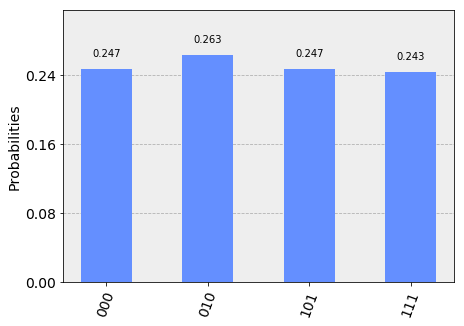

In [9]:
n=3#比特数
phi = pi/2#每次旋转角度
J = 1#迭代次数
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.h(qr[2])
qc.h(qr[1])
qc.h(qr[0])

for i in range(J):
    '''
    #oracle
    qc.x(qr[2])
    qc.ccx(qr[2],qr[1],qr[0])
    qc.cu1(phi/2,qr[1],qr[0])
    qc.cx(qr[2],qr[1])
    qc.cu1(-phi/2,qr[1],qr[0])
    qc.cx(qr[2],qr[1])
    qc.cu1(phi/2,qr[2],qr[0])
    qc.ccx(qr[2],qr[1],qr[0])
    
    qc.x(qr[1])
    qc.cu1(phi/2,qr[1],qr[0])
    qc.cx(qr[2],qr[1])
    qc.cu1(-phi/2,qr[1],qr[0])
    qc.cx(qr[2],qr[1])
    qc.cu1(phi/2,qr[2],qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    '''
    #oracle
    qc.x(qr[2])
    qc.cx(qr[2],qr[0])
    qc.cu1(phi,qr[2],qr[0])
    qc.cx(qr[2],qr[0])
    qc.x(qr[2])
    qc.cu1(phi,qr[2],qr[0])
    
    #Hn
    qc.h(qr[2])
    qc.h(qr[1])
    qc.h(qr[0])

    #条件相移
    qc.x(qr[2])
    qc.x(qr[1])
    qc.ccx(qr[2],qr[1],qr[0])
    qc.cu1(phi/2,qr[1],qr[0])
    qc.cx(qr[2],qr[1])
    qc.cu1(-phi/2,qr[1],qr[0])
    qc.cx(qr[2],qr[1])
    qc.cu1(phi/2,qr[2],qr[0])
    qc.ccx(qr[2],qr[1],qr[0])
    qc.x(qr[2])
    qc.x(qr[1])
    
    
    #Hn
    qc.h(qr[2])
    qc.h(qr[1])
    qc.h(qr[0])
'''    
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,4))
'''
#测量
for i in range(n):
    qc.measure(qr[i],cr[i])

shots=1024
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
visualization.plot_histogram(counts)
#circuit_drawer(qc)


In [12]:
beta = np.arcsin(1/2/np.sqrt(2))
jop = (pi/2-beta) / (2*beta)
J = np.floor(jop)#向下取整
print(J)
phi = 2*np.arcsin(np.sin(pi/(4*J+6)) / np.sin(beta))
print(phi)

1.0
2.1268800471555043


In [3]:
#测试非均匀叠加态
n=3#比特数

qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.4274,qr[2]);
qc.ch

'''
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
print(np.round(state_superposition,4))

backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
a = np.round(job.result().get_data(qc)['unitary'], 3)
print(a)
'''

[0.7071+0.7071j 0.    +0.    j 0.    +0.    j 0.    +0.    j]
[[ 0.707+0.707j -0.   -0.   j  0.   +0.   j  0.   +0.   j]
 [-0.   +0.   j  0.707+0.707j  0.   +0.   j  0.   +0.   j]
 [ 0.   +0.   j  0.   +0.   j  0.5  +0.5  j  0.5  +0.5  j]
 [ 0.   +0.   j  0.   +0.   j  0.5  +0.5  j -0.5  -0.5  j]]
